# Using the basicrobot 
See the project it.unibo.basicrobot2020

## Interaction with the Virtual Robot
The virtual robot is described in 
<a href="http://htmlpreview.github.com/?https://github.com/anatali/iss2020Lab/blob/master/it.unibo.robot2020/userDocs/LabVirtualRobot.html" target="web">
LabVirtualRobot</a>

In [ ]:
##############################################################
# clientToWenv.py
# sendToVirtualRobot : sends a command in output
# read               : acquires data from input
##############################################################
import socket
import time
import json

sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
virtualRobotPort = 8999
sep = ';'   #required by the Soffritti virtual robot 'language'

goForwardMsg  = '{"type": "moveForward",   "arg": -1  }'
goBackwardMsg = '{"type": "moveBackward",  "arg": -1  }'
turnLeftMsg   = '{"type": "turnLeft",      "arg": 400 }'
turnRightMsg  = '{"type": "turnRight",     "arg": 400 }'
haltMsg       = '{"type": "alarm",         "arg": 0   }'

def connect(port) :
    server_address = ('localhost', port)
    sock.connect(server_address)    
    print("CONNECTED WITH the virtual robot" , server_address)

def sendToVirtualRobot( message ) :
    print("forward ", message)
    msgJson = json.loads( message )
    msg     = sep+ json.dumps(msgJson)+ sep 
    byt=msg.encode()    #required in Python3
    sock.send( byt )

def work() :
    sendToVirtualRobot( goForwardMsg ) 
    time.sleep(1)
    sendToVirtualRobot( haltMsg ) 

def read() :
    BUFFER_SIZE = 1024
    data = sock.recv(BUFFER_SIZE)
    print( "received data:", data )

def terminate() :
    sock.close()
    print("BYE")

###########################################    
connect(virtualRobotPort)
work()
read()
terminate()

## Interaction with the basicrobot qactor
See the model: <a href="../src/basicrobot.qak" target="code">basicrobot.qak</a>.
<ol>
    <li>
        Activate the virtual robot and oper a browser on <tt>localhost:8090</tt>
    </li>
    <li>Launch the <tt>basicrobot</tt> as a 'standalone' application (microservice)
<pre>
cd C:\..\it.unibo.basicrobot2020-1.0\bin
it.unibo.basicrobot2020.bat
</pre>
    </li>
    <li>
        Execute the python code hereunder to move the robot
    </li>
    <li>
        Look at the received data when the (virtual) robot hits an obstacle
    </li>
</ol>


In [ ]:
##############################################################
# sendDispatch       : sends a command in output
# read               : acquires data from input
##############################################################
import socket
import time

robotName      = "basicrobot" # robotadapter | basicrobot

hostAdress     = '192.168.1.15'
basicRobotPort = 8018  
smartRobotPort = 8020  

goForwardMsg  = "msg(cmd,dispatch,python,"+ robotName +",cmd(w),1)"
goBackwardMsg = "msg(cmd,dispatch,python,"+ robotName +",cmd(s),1)" 
turnLeftMsg   = "msg(cmd,dispatch,python,"+ robotName +",cmd(a),1)"  
turnRightMsg  = "msg(cmd,dispatch,python,"+ robotName +",cmd(d),1)"  
haltMsg       = "msg(cmd,dispatch,python,"+ robotName +",cmd(h),1)"

sock          = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

def connect(port) :
    server_address = (hostAdress, port)
    sock.connect(server_address)    
    print("CONNECTED WITH , server_address")

def sendDispatch( message ) :
    print("forward ", message)
    msg = message + "\n"
    byt=msg.encode()    #required in Python3
    sock.send(byt)

def terminate() :
    sock.close()    #qak infrastr receives a msg null
    print("BYE")

def read() :
    sock.settimeout(1)
    try:
        rec = sock.recv(1024) # try to receive 100 bytes
        print("RECEIVED:" , rec )
    except socket.timeout: # fail after 1 second of no activity
        print("Didn't receive data! ")
    finally:
        terminate()

def console() :  
    cmd = str(input())
    while( cmd != "z" ) :
        if( cmd == "w" ) :
            sendDispatch( goForwardMsg ) 
        if( cmd == "s" ) :
            sendDispatch( goBackwardMsg ) 
        if( cmd == "a" ) :
            sendDispatch( turnLeftMsg ) 
        if( cmd == "d" ) :
            sendDispatch( turnRightMsg ) 
        if( cmd == "h" ) :
            sendDispatch( haltMsg ) 
        cmd = str(input())
          
##################################################
connect(basicRobotPort)
console()
read() 

Coroutines in Python work in a very similar way to Generators. 
Generators produce data
Coroutines consume data

In [ ]:
#===========================================================
#Generators produce values
#===========================================================

def cdown(n):
    print( "cdown from", n)
    while n > 0:
        yield n
        n -=1
#When the generator returns, iteration stops
x = cdown(2)   
x
next(x)    #python 3.x  --> 2
next(x)    # --> 1
#next(x) #ERROR: 
#x.next()  #NO in python 3.x
#for i in cdown(5):
#    print( i )

#One of the most powerful applications of generators is setting up processing pipelines

In [ ]:
#===========================================================
# Coroutines tend to consume values
#===========================================================

def grep(pattern):
    n = 0
    print( "Looking for %s" % pattern)
    try:
        while True:
            #use yield as an expression
            #If you use yield more generally, you get a coroutine
            # functions can consume values sent to it
            line = yield   #Sent values are returned by yield
            n = n+1
            if pattern in line:
                print( line , "| lines=", n)
    except GeneratorExit:
        print( "grep Going away. Goodbye" )

g = grep("python")
#next(g)     #you can use also
g.send(None) # advances execution
g.send("hello 1")
g.send("hello 2")
g.send("hello 3 python")
g.close()

STARTING ... 
CONNECTED WITH  ('192.168.1.15', 8018)


<Task pending coro=<work() running at <ipython-input-15-c519603567e8>:102>>

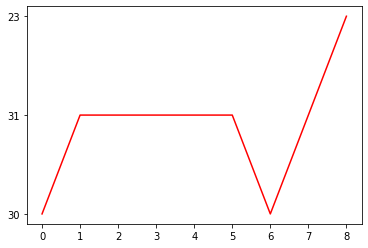

work STARTS :
readSock  STARTS :
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(30),1127)

sonarData= ['30']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(30),1128)

sonarData= ['30', '30']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(30),1129)

sonarData= ['30', '30', '30']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(30),1130)

sonarData= ['30', '30', '30', '30']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(30),1131)

sonarData= ['30', '30', '30', '30', '30']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(31),1132)

sonarData= ['30', '30', '30', '30', '30', '31']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(30),1133)

sonarData= ['30', '30', '30', '30', '30', '31', '30']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(31),1134)

sonarData= ['30', '30', '30', '30', '30', '31', '30', '31']
RECEIVED: msg(sonarRobot,event,robotadapter,none,sonar(31),1135)

sonarData= ['30', '30', '30', '30', '30', '31', '30', '31', '

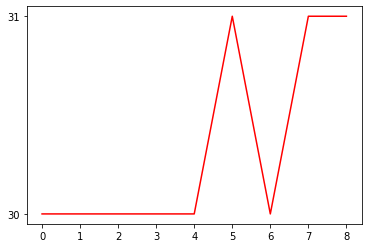

In [15]:
##############################################################
# sendDispatch       : sends a command in output
# read               : acquires data from input
##############################################################
import socket
import time
import matplotlib.pyplot as plt
import asyncio

robotName      = "basicrobot" # robotadapter | basicrobot

hostAdress     = '192.168.1.15'
basicRobotPort = 8018  
smartRobotPort = 8020  

sonarData      = []

goForwardMsg  = "msg(cmd,dispatch,python,"+ robotName +",cmd(w),1)"
goBackwardMsg = "msg(cmd,dispatch,python,"+ robotName +",cmd(s),1)" 
turnLeftMsg   = "msg(cmd,dispatch,python,"+ robotName +",cmd(a),1)"  
turnRightMsg  = "msg(cmd,dispatch,python,"+ robotName +",cmd(d),1)"  
haltMsg       = "msg(cmd,dispatch,python,"+ robotName +",cmd(h),1)"

sock          = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

def connect(port) :
    server_address = (hostAdress, port)
    sock.connect(server_address)    
    print("CONNECTED WITH ", server_address)

def terminate() :
    sock.close()    #qak infrastr receives a msg null
    print("BYE")

#reader  = None
    
async def plot() :
    print("plot STARTS ...")
    for i in range(1,10):
        #data = yield
        print("PLOT DATA:" , sonarData )
        plt.plot( list(sonarData), color='red')
        await asyncio.sleep(1) 
'''        
        #plt.plot(list(sonarData), color='red')
#        if not reader is None :
#            reader.send( 1 )
#        else :
#            reader = read( )
#            print("PLOT wait:" , data )
'''        

#plotter = plot()
#next( plotter )

async def readSock() :
    print("readSock  STARTS :"   )
    for i in range(1,10):
        try:
            line = ""
            while not line.endswith('\n'):
                data = sock.recv(1024) # try to receive k bytes
                line = line + data.decode("utf-8") 
            print("RECEIVED:" , line )
            msgitems = line.split(",")
            v = msgitems[4].split('(')[1].split(')')[0]
            sonarData.append( v )
            print("sonarData=" , sonarData )
        except socket.timeout: # fail after 1 second of no activity
            print("Didn't receive data! ")

async def read() :
    '''   
    sock.settimeout(60000)
    print("read STARTS :"   )
    ''' 
    #for i in range(1,10):
    print("read STARTS :"   )
    try:
        line = ""
        while not line.endswith('\n'):
            data = sock.recv(1024) # try to receive k bytes
            line = line + data.decode("utf-8") 
        print("RECEIVED:" , line )
        msgitems = line.split(",")
        v = msgitems[4].split('(')[1].split(')')[0]
        sonarData.append( v )
        print("sonarData=" , sonarData )
            #await asyncio.sleep(1)
            #print("v=" , v )
            #plotter.send( v )
            #goon = yield 
            ##yield line
    except socket.timeout: # fail after 1 second of no activity
        print("Didn't receive data! ")
        #finally:
            #terminate()
    
    #plt.plot( list(sonarData), color='red')
reader = readSock()

async def work() :
    sock.settimeout(60000)
    print("work STARTS :"   )
    #for i in range(5):
        #asyncio.ensure_future( read() )
    await reader
        #print("work DONE :"   )
    #await asyncio.sleep(0.5)
    print("work END :"   )
    plt.plot( list(sonarData), color='red')
    plt.show()
##################################################
print("STARTING ... ")
connect(basicRobotPort)

loop = asyncio.get_event_loop()
loop.create_task( work() )

#loop.create_task( plot() )

#myreader = read( )
#next( myreader )
#read( plotter )


#next( sonarData )
#console()
#read() 

https://www.tutorialspoint.com/concurrency_in_python/concurrency_in_python_introduction.htm
GIL (Global Interpreter Lock): prevents multiple threads from executing Python code in parallel
concurrency and parallelism are not same
Queues are by default, thread-safe data structure and we need not worry about implementing complex locking mechanism. 
Asyncio module was added in Python 3.4 and it provides infrastructure for writing single-threaded concurrent code using co-routines.

https://cheat.readthedocs.io/en/latest/python/asyncio.html

In [ ]:
import _thread
import time

def print_time( threadName, delay):
   count = 0
   while count < 5:
      time.sleep(delay)
      count += 1
      print ("%s: %s" % ( threadName, time.ctime(time.time()) ))

try:
   _thread.start_new_thread( print_time, ("Thread-1", 2, ) )
   _thread.start_new_thread( print_time, ("Thread-2", 4, ) )
except:
   print ("Error: unable to start thread")
while 1:
   pass

In [ ]:
#The <threading> module implements in an object oriented way and treats every thread as an object.
#Therefore, it provides much more powerful, high-level support for threads than 
#the <_thread> module. This module is included with Python 2.4.

import threading
import time
exitFlag = 0

class myThread (threading.Thread):
   def __init__(self, threadID, name, counter):
      threading.Thread.__init__(self)
      self.threadID = threadID
      self.name = name
      self.counter = counter
   def run(self):
      print ("Starting " + self.name)
      print_time(self.name, self.counter, 5)
      print ("Exiting " + self.name)
def print_time(threadName, delay, counter):
   while counter:
      if exitFlag:
         threadName.exit()
      time.sleep(delay)
      print ("%s: %s" % (threadName, time.ctime(time.time())))
      counter -= 1

thread1 = myThread(1, "Thread-1", 1)
thread2 = myThread(2, "Thread-2", 2)

thread1.start()
thread2.start()
thread1.join()
thread2.join()
print ("Exiting Main Thread")


In [ ]:
import asyncio

def hello_world(loop):
   print('Hello World')
   loop.stop()

loop = asyncio.get_event_loop()

loop.call_soon(hello_world, loop)

loop.run_forever()
loop.close()

In [ ]:
import asyncio

async def Myoperation():
    print("First Coroutine")
    #asyncio.sleep(1)
    
loop = asyncio.get_event_loop()
'''
# you cannot invoke a run_until_complete(), 
# since the loop you will receive from asyncio.get_event_loop() will be active
try:
    loop.run_until_complete( Myoperation() )
except Exception as e :
    print("[ERROR] ->" , e )

#finally:
   #loop.close()
'''   
# loop.create_task( Myoperation() )
asyncio.run_coroutine_threadsafe( Myoperation(), loop )

In [ ]:
import asyncio

async def a():
    for i in range(1,3):
        print("Coroutine a")
        await asyncio.sleep(1) 
async def b():
    for i in range(1,5):
        print("Coroutine b")
        await asyncio.sleep(2) 
    
loop = asyncio.get_event_loop()

loop.create_task( a() )
loop.create_task( b() )

In [ ]:
import asyncio
import time

async def Task_ex(n):
    time.sleep(0.5)
    print("Processing {}".format(n))
async def Generator_task():
    for i in range(1):
        asyncio.ensure_future( Task_ex(i) )
    print("Tasks Completed")
    await asyncio.sleep(0.5)
    print("Tasks Completed 1")

loop = asyncio.get_event_loop()
loop.create_task( Generator_task() )
#loop.run_until_complete(Generator_task())
#loop.close()

In [ ]:
import os  #HAS NO ATTRIBUTE fork

def child():
    n = os.fork()
   
    if n > 0:
        print("PID of Parent process is : ", os.getpid())

    else:
        print("PID of Child process is : ", os.getpid())
child()

In [10]:
import asyncio

async def Myoperation(future):
    print("Myoperation START")
    await asyncio.sleep(1)
    print("Myoperation END")
    future.set_result('Future Completed')

loop   = asyncio.get_event_loop()
future = asyncio.Future()
asyncio.ensure_future( Myoperation(future) )

print("BYE")
#loop.create_task( Myoperation(future) )
#print( future.result() )


BYE
Myoperation START
Myoperation END
